Part four: Test all the models in one meme
======================================================

In this notebook we test a meme from de test dataset.

## Import libraries, set PATH information and define functions

In [17]:
import cv2
import numpy as np
from PIL import Image
from mmf.utils import visualize
import pandas as pd
import re

PATH_CURRENT = '/home/jupyter/meme_hateful_detection'
PATH_MEMES_DATASET = f'{PATH_CURRENT}/data/raw/datasets/hateful_memes/defaults/annotations'
PATH_MEMES_IMAGES  = f'{PATH_CURRENT}/data/raw/datasets/hateful_memes/defaults/images/img'
PATH_INTERIM = f'{PATH_CURRENT}/data/interim'
PATH_DATA_OUT = f'{PATH_CURRENT}/data/processed'
PATH_MODEL = f'{PATH_CURRENT}/models'
PATH_SAVE = f'{PATH_CURRENT}/save'
PATH_LOGS = f'{PATH_SAVE}/logs'
PATH_REPO = f'{PATH_SAVE}/reports'

import warnings
warnings.filterwarnings('ignore')

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def load_info_meme(img_name):
    df_all = pd.read_pickle(f'{PATH_DATA_OUT}/models_output.pkl')
    df_all.head()
    img_id = int(re.findall(r'-?\d+', img_name)[0])
    img_path = cv2.imread(f'{PATH_MEMES_IMAGES}/{img_name}')
    img_cvt = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img_cvt)
    visualize.visualize_images([im_pil], size=(2500, 2000))

    result = df_all[df_all["id"].isin([img_id])==True].loc[0]
    print(f'{color.BOLD}Id:{color.END} {img_name}')
    print(f'Clasification {color.BOLD}Real:{color.END} {"Hateful" if int(result.label_real_class) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Unimodal Image-Grid:{color.END} {"Hateful" if int(result.label_unimodal_img_grid) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Unimodal Image-Region:{color.END} {"Hateful" if int(result.label_unimodal_img_region) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Unimodal Text BERT:{color.END} {"Hateful" if int(result.label_unimodal_text) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Multimodal Late Fusion:{color.END} {"Hateful" if int(result.label_late_fusion) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Multimodal Concat BERT:{color.END} {"Hateful" if int(result.label_concat_bert) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Multimodal MMBT-Grid:{color.END} {"Hateful" if int(result.label_mmbt_grid) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Multimodal MMBT-Region:{color.END} {"Hateful" if int(result.label_mmbt_region) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Multimodal ViLBERT:{color.END} {"Hateful" if int(result.label_vilbert_direct) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Multimodal Visual BERT:{color.END} {"Hateful" if int(result.label_visual_bert_direct) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Multimodal ViLBERT CC:{color.END} {"Hateful" if int(result.label_vilbert_from_cc) == 1 else "Non Hateful"}')
    print(f'Clasification {color.BOLD}Multimodal Visual BERT COCO:{color.END} {"Hateful" if int(result.label_visual_bert_from_coco) == 1 else "Non Hateful"}')

Id: 08291.png
Clasification Real: Hateful
Clasification Unimodal Image-Grid: Non Hateful
Clasification Unimodal Image-Region: Hateful
Clasification Unimodal Text BERT: Hateful
Clasification Multimodal Late Fusion: Hateful
Clasification Multimodal Concat BERT: Non Hateful
Clasification Multimodal MMBT-Grid: Non Hateful
Clasification Multimodal MMBT-Region: Non Hateful
Clasification Multimodal ViLBERT: Non Hateful
Clasification Multimodal Visual BERT: Non Hateful
Clasification Multimodal ViLBERT CC: Hateful
Clasification Multimodal Visual BERT COCO: Non Hateful


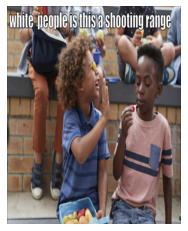

In [18]:
load_info_meme('08291.png')